# Final Project: Data Science Workflow
### Dataset: Contraceptive
### Collaborators: Antonio Gordillo Toledo, Quoc Dung Pham 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics

## 1. Exploratory Data Analysis (EDA)
### Load and preview the data

In [2]:
path = "final_proj_data/contraceptive/contraceptive_for_students.csv"
data = pd.read_csv(path)
display(data.head())
display(data.info())

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   wife_age            1473 non-null   int64
 1   wife_education      1473 non-null   int64
 2   husband_education   1473 non-null   int64
 3   num_child           1473 non-null   int64
 4   wife_religion       1473 non-null   int64
 5   wife_work           1473 non-null   int64
 6   husband_occupation  1473 non-null   int64
 7   standard_living     1473 non-null   int64
 8   media_exposure      1473 non-null   int64
 9   contraceptive       1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


None

### Data Correlation Overview

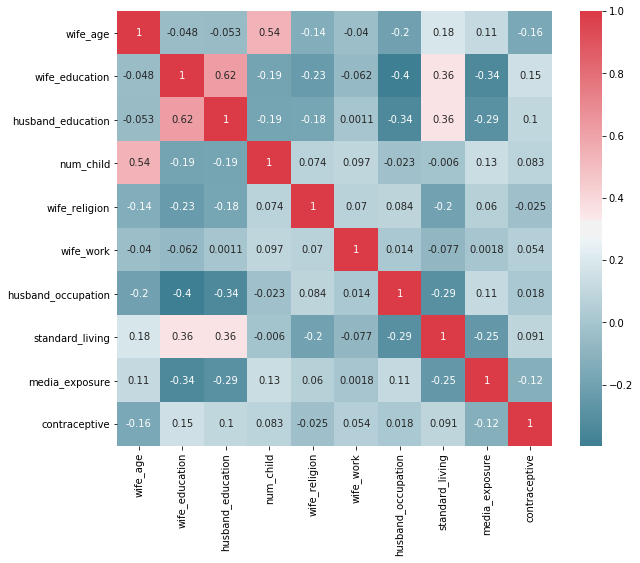

In [3]:
corr = data.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True);

Because the data is largely categorical, the correlation matrix above is somewhat nonsensical. One-hot encoding should be performed first to get meaningful results.

In [4]:
# One-hot encoding
# Pandas allows us to one-hot encode directly
cat = ['wife_education', 'husband_education', 'husband_occupation', 'standard_living']
data_ohe = pd.get_dummies(data, prefix=cat, columns=cat, drop_first=True)
data_ohe.head()

,wife_age,num_child,wife_religion,wife_work,media_exposure,contraceptive,wife_education_2,wife_education_3,wife_education_4,husband_education_2,husband_education_3,husband_education_4,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_living_2,standard_living_3,standard_living_4
0,24,3,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0
1,45,10,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,43,7,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,42,9,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
4,36,8,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0


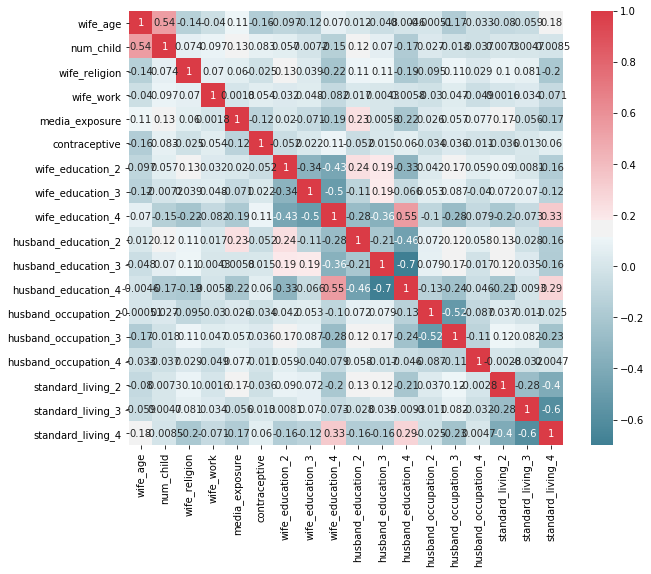

In [5]:
corr = data_ohe.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True);

**High correlation:**
- `num_child` and `wife_age`: this is expected because older women are more likly to have more children and vice-versa
-  `husband_education` and `wife_education`: it could be that similarly educated people tend to marry amongst each other. It is interesting to note that the strongest correlation is for education levels of 4.
-  `standard_living` and both `wife_education`/`husband_education`: the strongest correlation is for standard of living level 4 and education levels of 4.

### Data Distributions within each Label

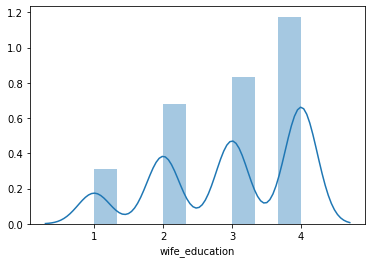

In [6]:
sns.distplot(data['wife_education']);

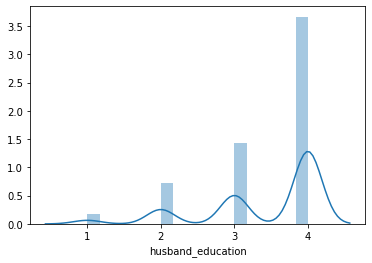

In [7]:
sns.distplot(data['husband_education']);

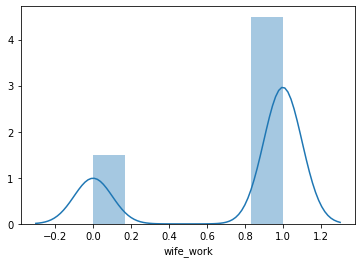

In [8]:
sns.distplot(data['wife_work']);

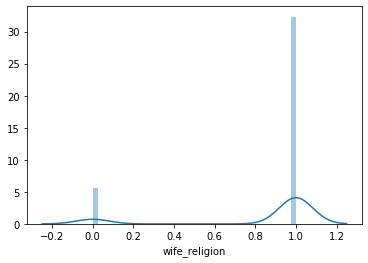

In [9]:
sns.distplot(data['wife_religion']);

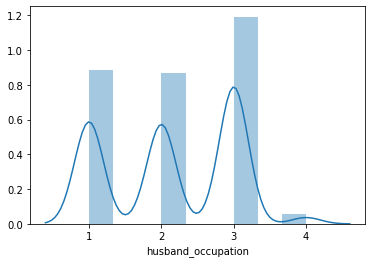

In [10]:
sns.distplot(data['husband_occupation']);

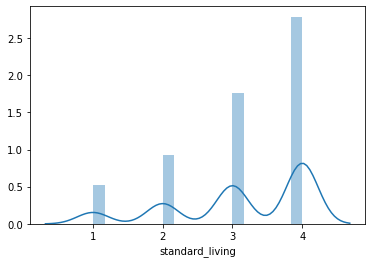

In [11]:
sns.distplot(data['standard_living']);

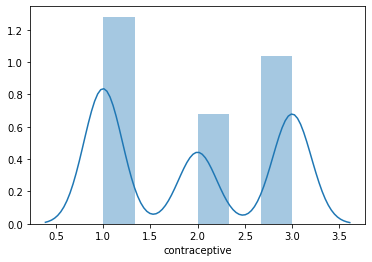

In [12]:
sns.distplot(data['contraceptive']);

Note that the dataset skews to more educated women with higher standards of being. This likely introduces bias into the data.

### Other Distribution Visualizations

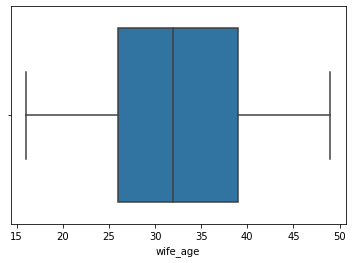

In [13]:
sns.boxplot(x='wife_age', data=data);

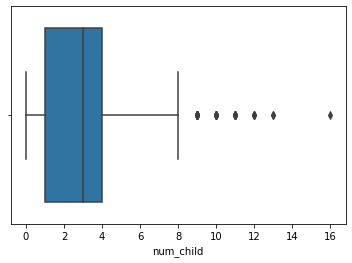

In [14]:
sns.boxplot(x='num_child', data=data);

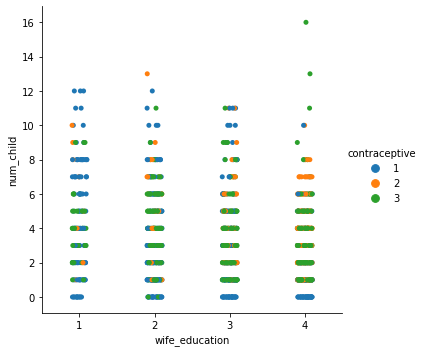

In [15]:
sns.catplot(x='wife_education', y='num_child', hue='contraceptive', data=data);

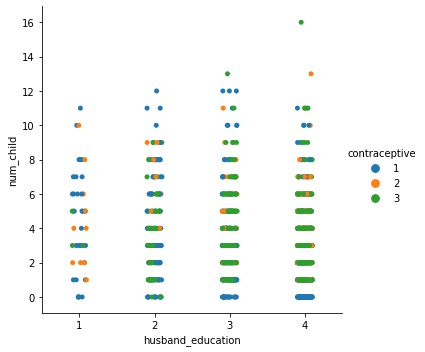

In [16]:
sns.catplot(x='husband_education', y='num_child', hue='contraceptive', data=data);

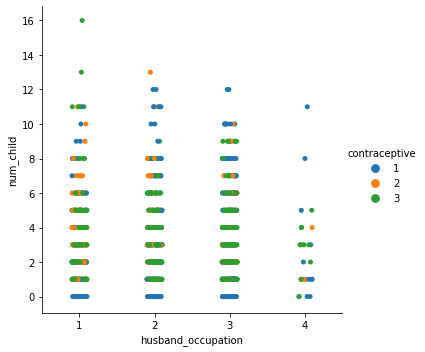

In [17]:
sns.catplot(x='husband_occupation', y='num_child', hue='contraceptive', data=data);

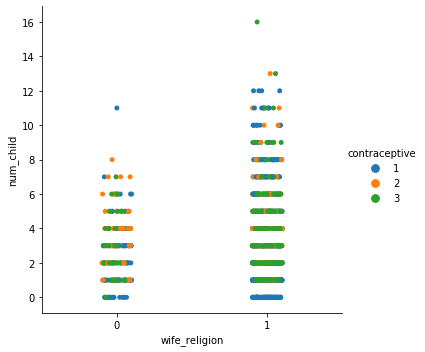

In [18]:
sns.catplot(x='wife_religion', y='num_child', hue='contraceptive', data=data);

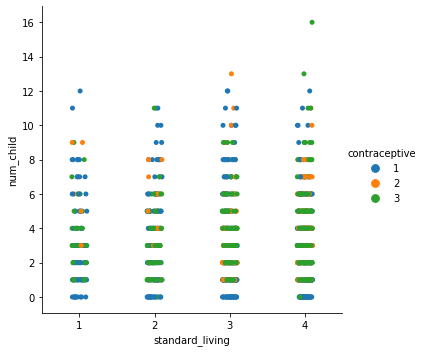

In [19]:
sns.catplot(x='standard_living', y='num_child', hue='contraceptive', data=data);

In [20]:
def dist(df, label):
    c1 = len(df[df[label] == 1]) / len(df)
    c2 = len(df[df[label] == 2]) / len(df)
    c3 = len(df[df[label] == 3]) / len(df)
    return [c1, c2, c3]

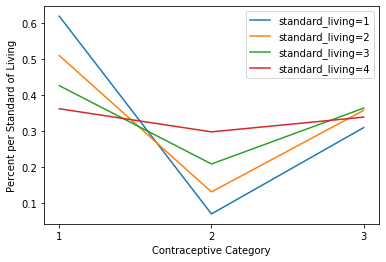

In [21]:
for i in range(1, 5):
    df = data[data['standard_living']==i]
    d = dist(df, 'contraceptive')
    plt.plot([1, 2, 3], d, label=f'standard_living={i}')
    plt.xticks([1,2,3])
    plt.legend()
    plt.xlabel('Contraceptive Category')
    plt.ylabel('Percent per Standard of Living')

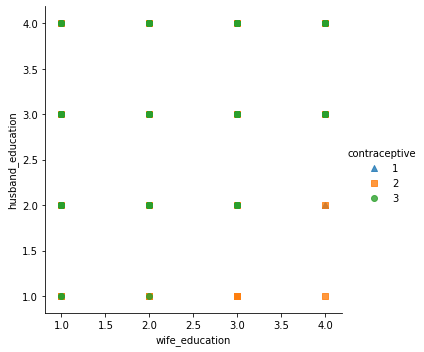

In [22]:
sns.lmplot('wife_education', 'husband_education', data=data, hue='contraceptive', markers=['^', 's', 'o'],
           fit_reg=False)

## 2. Data Cleaning and Transformation

One-hot encoding has already been preformed above. However, we can make a copy of the data where the numerical features are standardized.

In [23]:
# Max-min standardize 'wife_age' and 'num_child'
data_ohe_s = data_ohe.copy()
data_ohe_s['wife_age'] = ((data_ohe['wife_age'] - data_ohe['wife_age'].min())
                          / (data_ohe['wife_age'].max() - data_ohe['wife_age'].min()))
data_ohe_s['num_child'] = ((data_ohe['num_child'] - data_ohe['num_child'].min())
                           / (data_ohe['num_child'].max() - data_ohe['num_child'].min()))
data_ohe_s.head()

,wife_age,num_child,wife_religion,wife_work,media_exposure,contraceptive,wife_education_2,wife_education_3,wife_education_4,husband_education_2,husband_education_3,husband_education_4,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_living_2,standard_living_3,standard_living_4
0,0.242424,0.1875,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0
1,0.878788,0.6250,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,0.818182,0.4375,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,0.787879,0.5625,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
4,0.606061,0.5000,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0


## 3. Predictive Modeling
Given socio-economic factors, predict contraceptive use.

Helper functions are defined below.

In [24]:
def prep_data(df, label):
    X = df.drop(columns=label)
    y = df[label]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train(X_train, X_test, y_train, y_test, model, Cs):
    train_accs, test_accs = [], []

    for C in Cs:
        clf = model(C)
        clf.fit(X_train, y_train)

        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)

        train_accs.append(metrics.accuracy_score(train_pred, y_train))
        test_accs.append(metrics.accuracy_score(test_pred, y_test))

    return train_accs, test_accs

def plot_accs(train_accs, test_accs, model, Cs):
    print(f'Model: {model.__name__}')
    print(f'\tMax Train Set Accuracy: {max(train_accs)}')
    print(f'\tMax Test Set Accuracy: {max(test_accs)}')
    plt.plot(Cs, train_accs, label=f'train acc {model.__name__}')
    plt.plot(Cs, test_accs, label=f'test acc {model.__name__}')
    plt.title('C vs Accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.legend();

def run(df, label, model, Cs):
    X_train, X_test, y_train, y_test = prep_data(df, label)
    train_accs, test_accs = train(X_train, X_test, y_train, y_test, model, Cs)
    plot_accs(train_accs, test_accs, model, Cs)

## Three Categories
Try RandomForestClassifier and SVC for different types of data processing. Various parameter values (C) will be used to see how accuracy is affected. For RandomForestClassifiers, C is the number of iterations to perform.

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.9584040747028862
	Max Test Set Accuracy: 0.559322033898305
Model: SVC
	Max Train Set Accuracy: 0.5772495755517827
	Max Test Set Accuracy: 0.6067796610169491


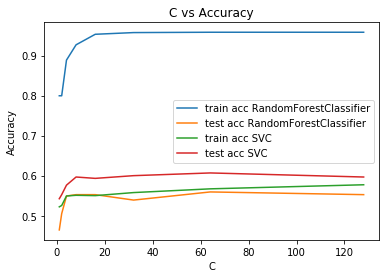

In [25]:
# Without one-hot encoding
Cs = [1, 2, 4, 8, 16, 32, 64, 128]
run(data, 'contraceptive', RandomForestClassifier, Cs)
run(data, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.9584040747028862
	Max Test Set Accuracy: 0.5322033898305085
Model: SVC
	Max Train Set Accuracy: 0.5823429541595926
	Max Test Set Accuracy: 0.6067796610169491


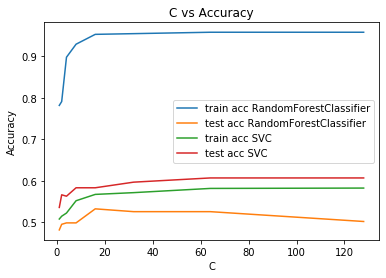

In [26]:
# With one-hot encoding
run(data_ohe, 'contraceptive', RandomForestClassifier, Cs)
run(data_ohe, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.9584040747028862
	Max Test Set Accuracy: 0.5322033898305085
Model: SVC
	Max Train Set Accuracy: 0.7546689303904923
	Max Test Set Accuracy: 0.511864406779661


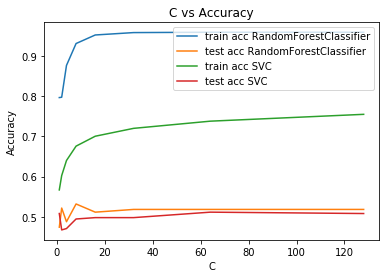

In [27]:
# With one-hot encoding and min-max standardization
run(data_ohe_s, 'contraceptive', RandomForestClassifier, Cs)
run(data_ohe_s, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.6375212224108658
	Max Test Set Accuracy: 0.5220338983050847
Model: SVC
	Max Train Set Accuracy: 0.5517826825127334
	Max Test Set Accuracy: 0.5627118644067797


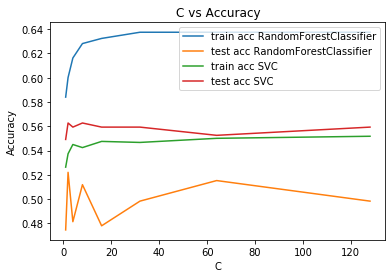

In [28]:
# With only min-max standardization numerical data
data_s_only = data_ohe_s[['wife_age', 'num_child', 'contraceptive']]
run(data_s_only, 'contraceptive', RandomForestClassifier, Cs)
run(data_s_only, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.6086587436332768
	Max Test Set Accuracy: 0.4406779661016949
Model: SVC
	Max Train Set Accuracy: 0.6086587436332768
	Max Test Set Accuracy: 0.46779661016949153


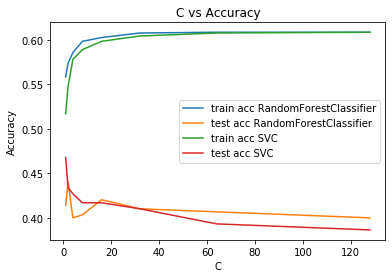

In [29]:
# With only categorical data
data_ohe_only = data_ohe.drop(columns=['wife_age', 'num_child'])
run(data_ohe_only, 'contraceptive', RandomForestClassifier, Cs)
run(data_ohe_only, 'contraceptive', SVC, Cs)

## Two Categories

In [30]:
# Turn label into binary
f = lambda x: 1 if x > 1 else 0
data['contraceptive'] = data['contraceptive'].apply(f)
data_ohe['contraceptive'] = data_ohe['contraceptive'].apply(f)
data_ohe_s['contraceptive'] = data_ohe_s['contraceptive'].apply(f)
data_s_only['contraceptive'] = data_s_only['contraceptive'].apply(f)
data_ohe_only['contraceptive'] = data_ohe_only['contraceptive'].apply(f)

<ipython-input-30-a50f68fbd871>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_only['contraceptive'] = data_s_only['contraceptive'].apply(f)


Model: RandomForestClassifier
	Max Train Set Accuracy: 0.9770797962648556
	Max Test Set Accuracy: 0.7220338983050848
Model: SVC
	Max Train Set Accuracy: 0.7393887945670629
	Max Test Set Accuracy: 0.7559322033898305


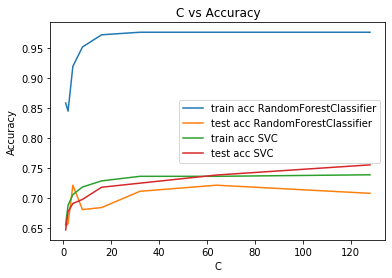

In [31]:
run(data, 'contraceptive', RandomForestClassifier, Cs)
run(data, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.9770797962648556
	Max Test Set Accuracy: 0.6915254237288135
Model: SVC
	Max Train Set Accuracy: 0.7470288624787776
	Max Test Set Accuracy: 0.7559322033898305


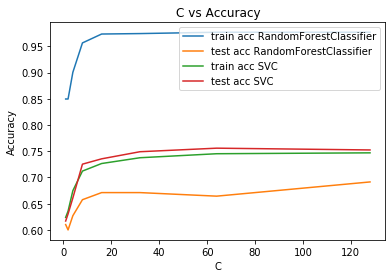

In [32]:
# With one-hot encoding
run(data_ohe, 'contraceptive', RandomForestClassifier, Cs)
run(data_ohe, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.9770797962648556
	Max Test Set Accuracy: 0.7016949152542373
Model: SVC
	Max Train Set Accuracy: 0.8412563667232598
	Max Test Set Accuracy: 0.6779661016949152


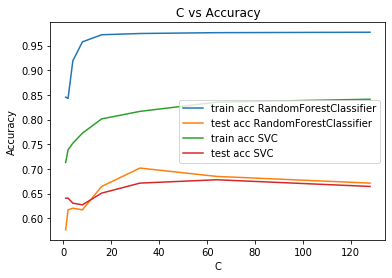

In [33]:
# With one-hot encoding and min-max standardization
run(data_ohe_s, 'contraceptive', RandomForestClassifier, Cs)
run(data_ohe_s, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.7699490662139219
	Max Test Set Accuracy: 0.7016949152542373
Model: SVC
	Max Train Set Accuracy: 0.7071307300509337
	Max Test Set Accuracy: 0.7152542372881356


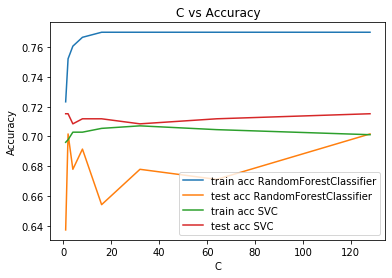

In [34]:
# With only min-max standardization numerical data
data_s_only = data_ohe_s[['wife_age', 'num_child', 'contraceptive']]
run(data_s_only, 'contraceptive', RandomForestClassifier, Cs)
run(data_s_only, 'contraceptive', SVC, Cs)

Model: RandomForestClassifier
	Max Train Set Accuracy: 0.733446519524618
	Max Test Set Accuracy: 0.5796610169491525
Model: SVC
	Max Train Set Accuracy: 0.733446519524618
	Max Test Set Accuracy: 0.6271186440677966


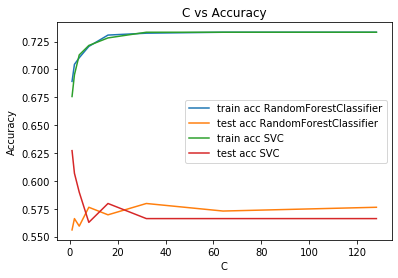

In [35]:
# With only categorical data
data_ohe_only = data_ohe.drop(columns=['wife_age', 'num_child'])
run(data_ohe_only, 'contraceptive', RandomForestClassifier, Cs)
run(data_ohe_only, 'contraceptive', SVC, Cs)

RandomForestClassifiers seem to always overfit, regardless of the DataFrame that is passed into the model and regardless of the number of estimators used. SVC performs better than RandomForestClassifiers because it does a better job of generalizing rather than overfitting.

Of all five DataFrames used, the best results were obtained using the unprocessed and one-hot encoded DataFrames. This is strange, as it should be expected that one-hot encoding would make a greater difference.

Solely using numerical or categorical data as model input drastically decreased the accuracy of the model.